In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
import os
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
train_dir = 'data/train/'
validation_dir = 'data/test/'

batch_size = 32
img_height = 64
img_width = 64

In [3]:
# Data augmentation and rescaling for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Create training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical' # Use 'categorical' for multi-class classification
)

Found 14034 images belonging to 6 classes.


Display one image from each class 

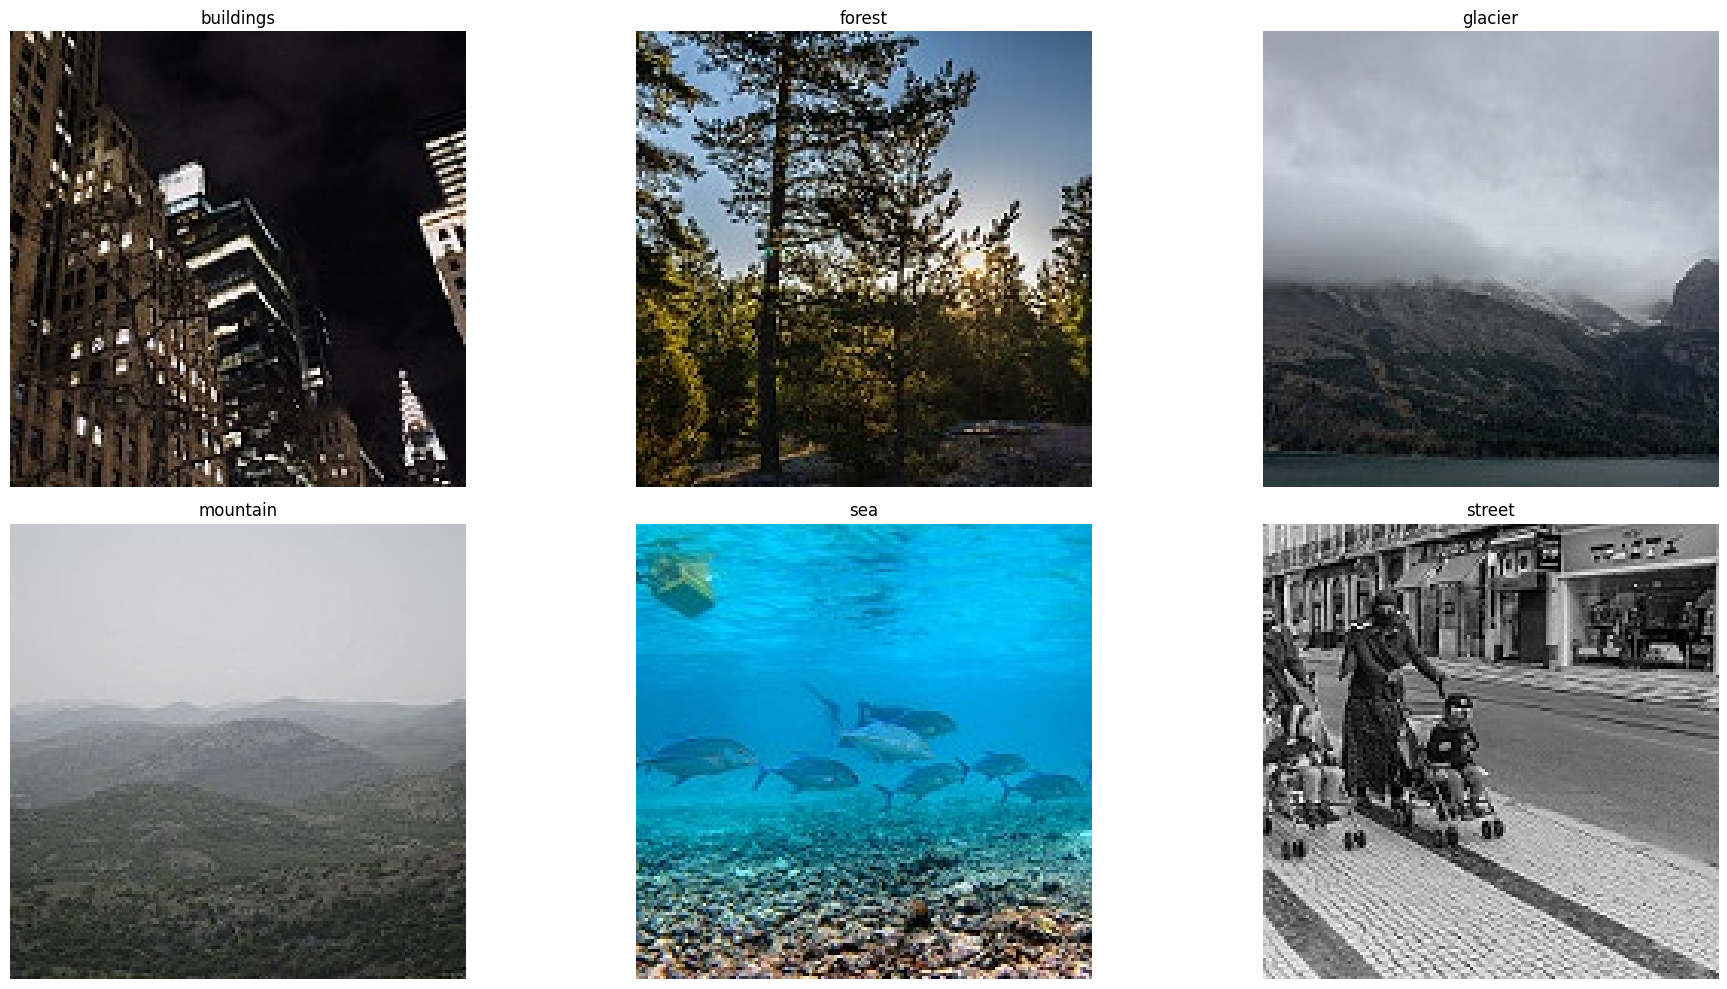

In [5]:
# Get the class names
class_names = list(train_generator.class_indices.keys())

# Determine the number of rows and columns
num_classes = len(class_names)
num_cols = (num_classes + 1) // 2  # Ensure we have at least two rows
num_rows = 2

# Create a figure to display images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Iterate over class names to get one image from each category
for i, class_name in enumerate(class_names):
    row = i // num_cols
    col = i % num_cols
    
    # Path to the directory containing images of the current class
    class_dir = os.path.join(train_dir, class_name)
    
    # Get one image filename from the current class directory
    image_name = os.listdir(class_dir)[0]
    
    # Load the image
    image_path = os.path.join(class_dir, image_name)
    image = plt.imread(image_path)
    
    # Display the image
    ax = axes[row, col]
    ax.imshow(image)
    ax.set_title(class_name)
    ax.axis('off')

# Remove any empty subplots
for i in range(num_classes, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [6]:
# Create validation data generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical' 
)

Found 3000 images belonging to 6 classes.


### CNN

To achieve the best results, we are using 5 layers of Conv2D and MaxPooling, and then connecting them to the ANN neural network.

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same' , input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu' ,  padding='same' ),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu' , padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu' , padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu' , padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1028, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax') 
])

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1028)           │     2,106,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         6,174 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,043,368 (42.13 MB)

 Trainable params: 3,681,122 (14.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,362,246 (28.08 MB)

In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples 
)

Epoch 1/20
14034/14034 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.5004 - loss: 1.2149 - val_accuracy: 0.5193 - val_loss: 1.3130
Epoch 2/20
14034/14034 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.6296 - loss: 0.9560 - val_accuracy: 0.7243 - val_loss: 0.7405
Epoch 3/20
14034/14034 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.6784 - loss: 0.8490 - val_accuracy: 0.7307 - val_loss: 0.7803
Epoch 4/20
14034/14034 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.7072 - loss: 0.7907 - val_accuracy: 0.7397 - val_loss: 0.7189
Epoch 5/20
14034/14034 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.7262 - loss: 0.7406 - val_accuracy: 0.7660 - val_loss: 0.6579
Epoch 6/20
14034/14034 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.7380 - loss: 0.7047 - val_accuracy: 0.6977 - val_loss: 0.8460
Epoch 7/20
14034/14034 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.7532 - loss: 0.6705 - val_accuracy: 0.8083 - val_loss: 0.5347
Epoch 8/20
14034/14034 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 

### We achieved an 81% accuracy on the training data and, notably, an 82% accuracy on the validation dataset, which is commendable. These results indicate that the model does not suffer from overfitting. Therefore, we anticipate maintaining this level of accuracy in future predictions when classifying images.

### Prediction on some images 

Load and preprocess the images 

In [19]:
# Define image size and paths

image_paths = ['data/pred/image1.jpg', 
               'data/pred/image2.jpg', 
               'data/pred/image3.jpg', 
               'data/pred/image4.jpg', ]

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale the image
    return img_array

# Load and preprocess all images
images = np.vstack([preprocess_image(img_path) for img_path in image_paths])


In [20]:
# Make predictions
predictions = model.predict(images)

predicted_classes = np.argmax(predictions, axis=1)  # Get the indices of the highest probabilities

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


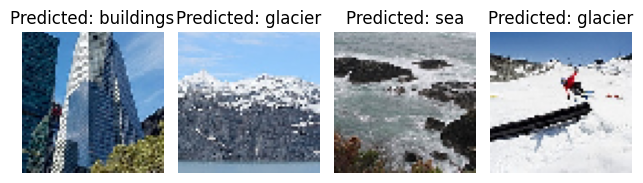

In [21]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

# Get the class labels
predicted_class_labels = [class_names[predicted_class] for predicted_class in predicted_classes]


for i, (img_path, label) in enumerate(zip(image_paths, predicted_class_labels)):
    plt.subplot(1, len(image_paths), i+1)  # One row, as many columns as images
    img = image.load_img(img_path, target_size=(img_height, img_width))
    plt.imshow(img)
    plt.title(f'Predicted: {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


### The trained model is able to classify these sample images with 100% accuracy.